<a href="https://colab.research.google.com/github/JoaoGustavo29/Portfolio_DataScience/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
 
# Importar warnings filter
from warnings import simplefilter

# Ignorar futuros warnings
simplefilter(action='ignore', category=FutureWarning)

# Configurar o notebook
sns.set_style('dark')

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [2]:
# Importar o arquivo
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# Importar o arquivo para um DataFrame
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

* Ver as 5 primeiras entradas


In [3]:
# Visualizar as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* Ver o resumo estatístico do dataframe

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* Verificar se há valores ausentes

In [5]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*




0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



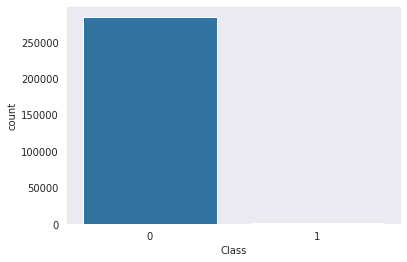

In [6]:
# Checar o balanceamento das classes
print(df.Class.value_counts())
print('\nFraudes representam {:.4f}% do dataset.\n'.format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# Plotar gráfico de barras para as Classes
sns.countplot('Class', data=df);

* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)

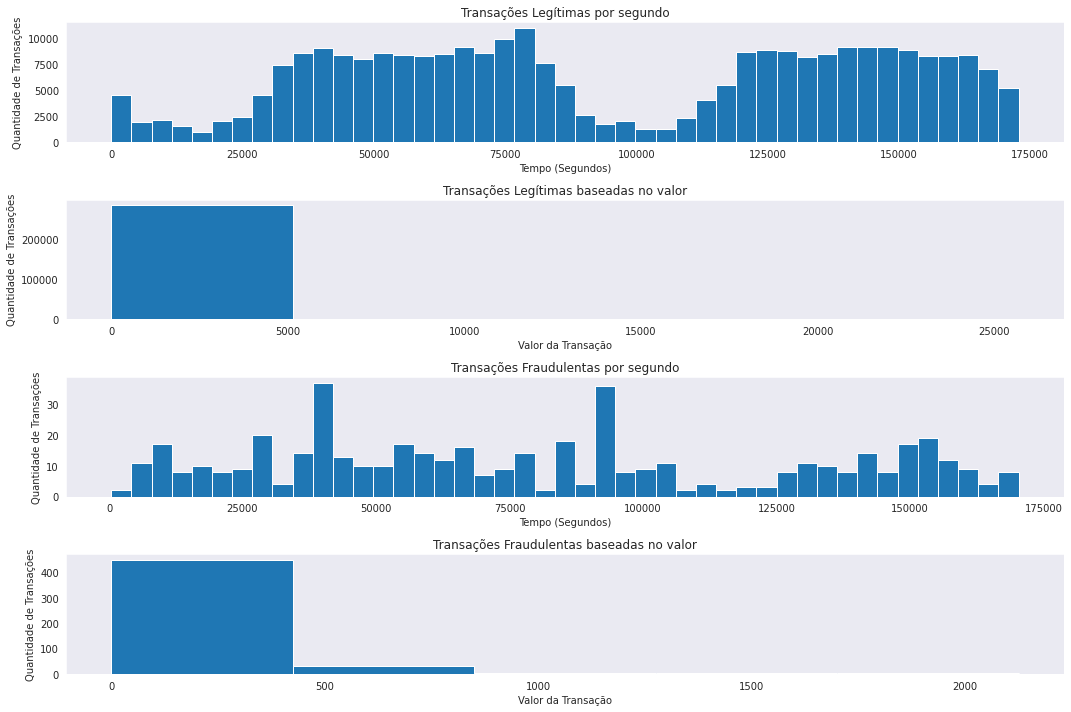

In [7]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,10))

num_bins_time = 45
num_bins_amount = 5

ax[0].hist(df.Time[df.Class == 0], bins=num_bins_time)
ax[0].set_title('Transações Legítimas por segundo')
ax[0].set_ylabel('Quantidade de Transações')
ax[0].set_xlabel('Tempo (Segundos)')

ax[1].hist(df.Amount[df.Class == 0], bins=num_bins_amount)
ax[1].set_title('Transações Legítimas baseadas no valor')
ax[1].set_ylabel('Quantidade de Transações')
ax[1].set_xlabel('Valor da Transação')

ax[2].hist(df.Time[df.Class == 1], bins=num_bins_time)
ax[2].set_title('Transações Fraudulentas por segundo')
ax[2].set_ylabel('Quantidade de Transações')
ax[2].set_xlabel('Tempo (Segundos)')

ax[3].hist(df.Amount[df.Class == 1], bins=num_bins_amount)
ax[3].set_title('Transações Fraudulentas baseadas no valor')
ax[3].set_ylabel('Quantidade de Transações')
ax[3].set_xlabel('Valor da Transação')

plt.tight_layout();

* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)

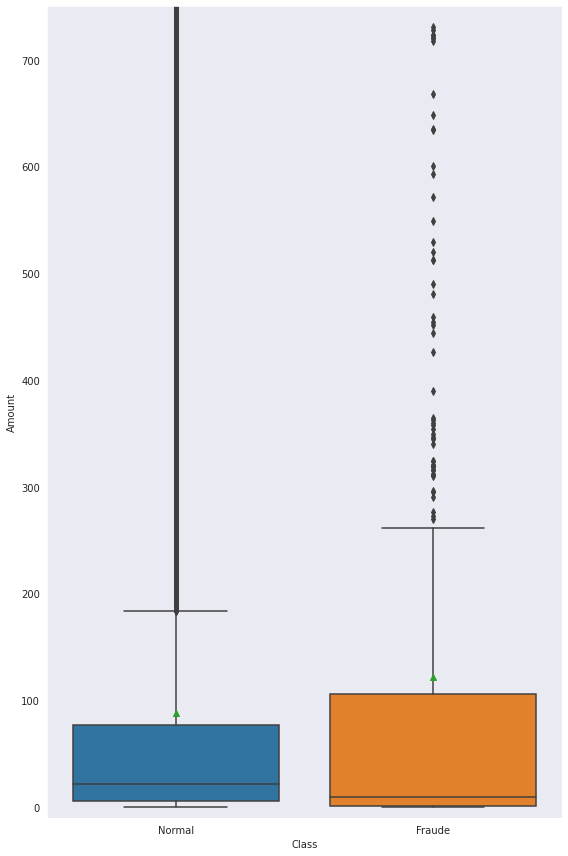

In [8]:
fig , ax = plt.subplots(figsize=(8, 12), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax, orient='v')
plt.ylim((-10, 750))
plt.xticks([0, 1],['Normal', 'Fraude'])

plt.tight_layout();


* Plotar uma matriz de correlação

## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* [*Recomendado*] Balancear o conjunto de dados

In [9]:
# Importar pacotes nescessários do Scikit-Learn para preparar os dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# Criar cópia do DataFrame 
df_clean = df.copy()

# Padronizar as colunas Time e Amount
scaler = StandardScaler()
df_clean['Scaler_amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['Scaler_time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# Ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaler_amount,Scaler_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [11]:
# Separar os dados entre feature matrix e target vector 
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

### Balanceamento dos Dados com Under-Sampling (RUS)

1    369
0    369
dtype: int64


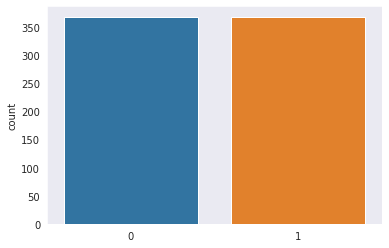

In [12]:
# Balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# Plotar a nova distribuição de Classes
sns.countplot(y_rus);

### Balanceamento dos Dados com Over-Sampling (SMOTE) 


1    213236
0    213236
dtype: int64


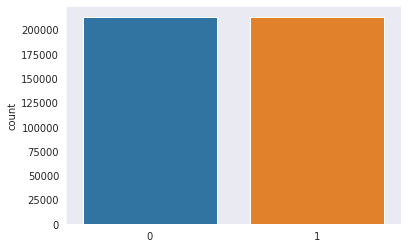

In [13]:
# Balanceamento dos dados
from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_smo, y_smo = smo.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_smo).value_counts())

# Plotar a nova distribuição de Classes
sns.countplot(y_smo);

### Balanceamento dos Dados com Over-Sampling (ADASYN)

0    213236
1    213228
dtype: int64


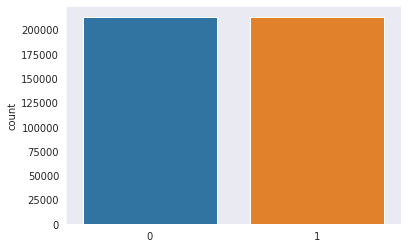

In [14]:
# Balanceamento dos dados
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_ada).value_counts())

# Plotar a nova distribuição de Classes
sns.countplot(y_ada);

## Regressão Logística

### Construção do Modelo sem Balanceamento dos Dados

antes da cosntrução do modelo vamos lembrar como estão distribuidas as classes

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



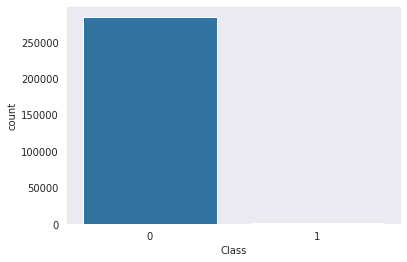

In [15]:
# Checar o balanceamento das classes
print(df.Class.value_counts())
print('\nFraudes representam {:.4f}% do dataset.\n'.format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# Plotar gráfico de barras para as Classes
sns.countplot('Class', data=df);

In [16]:
# Escolher e importa um modelo
from sklearn.linear_model import LogisticRegression

# Escolher e instanciar os Hyperparameters
model = LogisticRegression()

# Fit do Modelo (Treinar)
model.fit(X_train, y_train)

# Fazer previsões em cima de novos dados 
y_pred_log = model.predict(X_test)

#### Avaliando o Desempenho do Modelo

In [17]:
# Instalar pacote para plotar matriz de confusão
!pip install -q scikit-plot

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9991    0.9999    0.9995     71079
           1     0.8986    0.5041    0.6458       123

    accuracy                         0.9990     71202
   macro avg     0.9488    0.7520    0.8227     71202
weighted avg     0.9990    0.9990    0.9989     71202

AUC: 0.7520



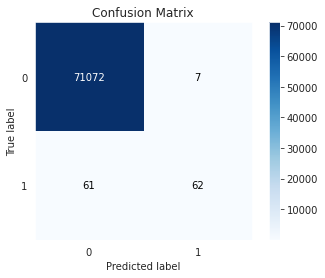

In [18]:
# Importar pacotes para avaliar o desempenho do modelo 
from sklearn.metrics import classification_report
import scikitplot as skplt

# Plotar matriz de confusão 
skplt.metrics.plot_confusion_matrix(y_test, y_pred_log)

# Imprimir Relatório de Classificação
print('Relatório de Classificação:\n', classification_report(y_test, y_pred_log, digits=4))

# Imprimir área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_log)))

### Construção do Modelo (RUS)

* Construir um modelo para **classificação**.
* [*Opcional*] Construir mais de um modelo para avaliar os desempenhos

In [19]:
# Escolher e instanciar os Hyperparameters
model_rus = LogisticRegression()

# Fit do modelo (Treinar)
model_rus.fit(X_rus, y_rus)

# Fazer previsões em cima de novos dados 
y_pred_rus = model_rus.predict(X_test)
y_proba_rus = model_rus.predict_proba(X_test)

#### Avaliando o Desempenho do Modelo

* Identificar a melhor métrica para esse tipo de modelo
* [*Opcional*] Comparar o desempenho entre diversos modelos

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9748    0.9871     71079
           1     0.0545    0.8374    0.1023       123

    accuracy                         0.9746     71202
   macro avg     0.5271    0.9061    0.5447     71202
weighted avg     0.9981    0.9746    0.9856     71202

AUC: 0.9061



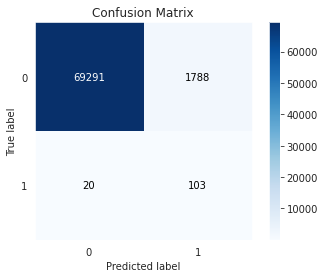

In [20]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rus)

# Imprimir relatório de classificação
print('Relatório de Classificação:\n',classification_report(y_test, y_pred_rus, digits=4))

# Imprimir a área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_rus)))

### Construção do Modelo (SMOTE)

In [21]:
# Escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# Escolher e instanciar os Hyperparameters
model_smo = LogisticRegression()

# Fit do modelo (Treinar)
model_smo.fit(X_smo, y_smo)

# Fazer previsões em cima de novos dados 
y_pred_smo = model_smo.predict(X_test)
y_proba_smo = model_smo.predict_proba(X_test)

#### Avaliando o Desempenho Modelo

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9813    0.9904     71079
           1     0.0719    0.8374    0.1325       123

    accuracy                         0.9811     71202
   macro avg     0.5358    0.9094    0.5614     71202
weighted avg     0.9981    0.9811    0.9889     71202

AUC: 0.9094



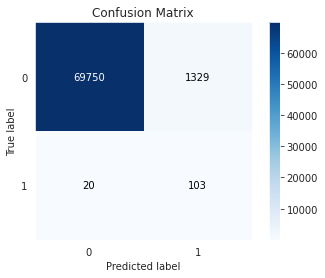

In [22]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_smo)

# Imprimir relatório de classificação
print('Relatório de Classificação:\n',classification_report(y_test, y_pred_smo, digits=4))

# Imprimir a área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_smo)))

### Construção do Modelo (ADASYN)

In [23]:
# Escolher e plotar um modelo
model_ada = LogisticRegression()

# Fit do modelo (Treinar)
model_ada.fit(X_ada, y_ada)

# Fazer previsões em cima de novos dados 
y_pred_ada = model_ada.predict(X_test)
y_proba_ada = model_ada.predict_proba(X_test)

#### Avaliando o Desempenho Modelo

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9998    0.9181    0.9572     71079
           1     0.0189    0.9106    0.0370       123

    accuracy                         0.9181     71202
   macro avg     0.5094    0.9143    0.4971     71202
weighted avg     0.9981    0.9181    0.9556     71202

AUC: 0.9143



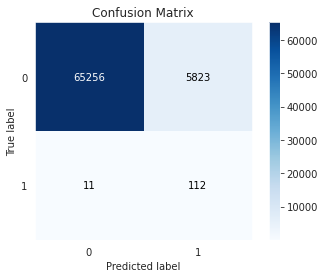

In [24]:
# Plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ada)

# Imprimir relatório de classificação
print('Relatório de Classificação: \n', classification_report(y_test, y_pred_ada, digits=4))

# Imprimir a área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_ada)))

## Árvores De Decisão (Decision Trees)

Como ja temos os dados preparados, apenas precisamos balancear os dados e construir os modelos


### Construção do Modelo sem Balanceamento dos Dados

In [97]:
# Escolher e importar o modelo
from sklearn.tree import DecisionTreeClassifier

# Escolher os Hyperparameters
model_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy')

# Fit do Modelo(Treinar)
model_tree.fit(X_train, y_train)

# Fazer previsões em cima dos dados de teste
y_pred_tree = model_tree.predict(X_test)

#### Avaliando o Desempenho do Modelo

              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9996     71079
           1     0.8485    0.6829    0.7568       123

    accuracy                         0.9992     71202
   macro avg     0.9240    0.8414    0.8782     71202
weighted avg     0.9992    0.9992    0.9992     71202

AUC: 0.8414



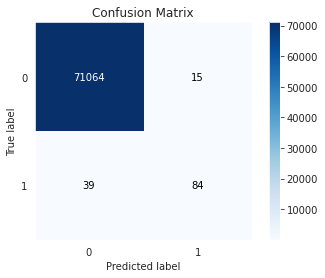

In [98]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree)

# Imprimir classification report
print(classification_report(y_test, y_pred_tree, digits=4))

# Imprimir área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_tree)))

### Construção do Modelo (RUS)

In [91]:
# Escolher os hyperparameters 
model_tree_rus = DecisionTreeClassifier(max_depth=8, criterion='entropy')

# Fit do Modelo (Treinar)
model_tree_rus.fit(X_rus, y_rus)

# Fazer previsões em cima dos dados de teste
y_pred_tree_rus = model_tree_rus.predict(X_test)
y_proba_tree_rus = model_tree_rus.predict_proba(X_test)

#### Avaliando o desempenho do modelo

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9997    0.9259    0.9614     71079
           1     0.0194    0.8455    0.0379       123

    accuracy                         0.9258     71202
   macro avg     0.5095    0.8857    0.4996     71202
weighted avg     0.9980    0.9258    0.9598     71202

AUC: 0.8857



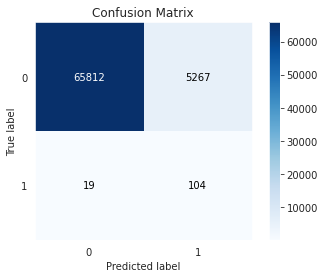

In [99]:
# Plotar matriz de confusão 
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree_rus)

# Imprimir relatório de classificação
print('Relatório de Classificação: \n', classification_report(y_test, y_pred_tree_rus, digits=4))

# Imprimir a Área sob Curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_tree_rus)))

### Construção do Modelo (SMOTE)

In [49]:
# Escolher os Hyperparameters
model_tree_smo = DecisionTreeClassifier(max_depth=6, criterion='entropy')

# Fit do Modelo(Treinar)
model_tree_smo.fit(X_smo, y_smo)

# Fazer previsões em cima dos dados de teste
y_pred_tree_smo = model_tree_smo.predict(X_test)

#### Avaliando o Desempenho do Modelo

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9997    0.9767    0.9881     71079
           1     0.0569    0.8130    0.1064       123

    accuracy                         0.9764     71202
   macro avg     0.5283    0.8949    0.5472     71202
weighted avg     0.9980    0.9764    0.9865     71202

AUC: 0.8949



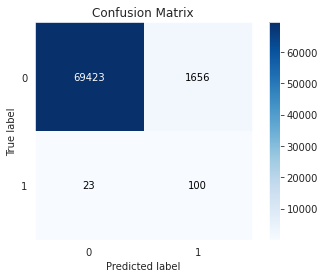

In [52]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree_smo)

# Imprimir classification report
print('Relatório de Classificação: \n', classification_report(y_test, y_pred_tree_smo, digits=4))

# Imprimir área sob curva 
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test,y_pred_tree_smo)))

### Construção do Modelo (ADASYN)


In [106]:
# Escolher os Hyperparameters
model_tree_ada = DecisionTreeClassifier(max_depth=8, criterion='entropy')

# Fit do Modelo (Treinar)
model_tree_ada.fit(X_ada, y_ada)

# Fazer previsões em cima dos dados de teste
y_pred_tree_ada = model_tree_ada.predict(X_test)

#### Avaliando o Desempenho do Modelo

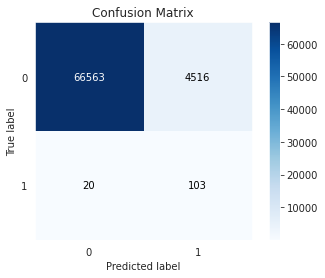

In [107]:
# Plotar Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree_ada)

## Conclusão

* Escrever suas conclusões a respeito da construção do modelo